# [INTRODUCTION](#1)<br>

[1. Read datas](#2)<br>
[2. Poverty rate of each state](#3)<br>
[3. Most common 15 Name or Surname of killed people](#4)<br>
[4. High school graduation rate of the population that is older than 25 in states](#5)<br>
[5. Percentage of state's population according to races that are black,white,native american, asian and hispanic](#6)<br>
[6. High school graduation rate vs Poverty rate of each state](#7)<br>
[7. Kill properties<br>](#8)<br>
<font color ='red'>
 &emsp;Manner of death<br>
 &emsp;Kill weapon<br>
 &emsp;Age of killed people<br>
 &emsp;Race of killed people<br>
 &emsp;Most dangerous cities<br>
 &emsp;Most dangerous states<br>
 &emsp;Having mental ilness or not for killed people<br>
 &emsp;Threat types<br>
 &emsp;Flee types <br> 
 &emsp;Having body cameras or not for police<br>
8. Race rates according to states in kill data<br>
9. Kill numbers from states in kill data<br>
10. Plotly Visualization Tutorial: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners<br>
    
<font color ='blue'><br>
Plot Contents:<br>
[11. Bar Plot](#11)<br>
[12. Point Plot](#12)<br>
[13. Joint Plot](#13)<br>
[14. Pie Chart](#14)<br>
[15. Lm Plot](#15)<br>
[16. Kde Plot](#16)<br>
[17. Violin Plot](#17)<br>
[18. Heatmap](#18)<br>
[19. Box Plot](#19)<br>
[20. Swarm Plot](#20)<br>
[21. Pair Plot](#21)<br>
[22. Count Plot](#22)<br>

<a id='1'></a><br>

## INTRODUCTION

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
warnings.filterwarnings('ignore') 

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

fatal-police-shootings-in-the-us

/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv


In [18]:
# Read datas
median_house_hold_in_come = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', encoding="windows-1252")

In [19]:
df=pd.DataFrame()

In [20]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [21]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [22]:
percentage_people_below_poverty_level.rename(columns={'Geographic Area': 'Geographic_Area'}, inplace=True)
percentage_people_below_poverty_level.describe()

AL=percentage_people_below_poverty_level[percentage_people_below_poverty_level.Geographic_Area=="AL"]
AL.describe()

,Geographic_Area,City,poverty_rate
count,585,585,585
unique,1,585,327
top,AL,Abanda CDP,0
freq,585,1,24


In [23]:
percentage_people_below_poverty_level['Geographic_Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [24]:
percentage_people_below_poverty_level.poverty_rate.value_counts()


0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64


<a id='11'></a><br>
### 11. BARPLOT<br>


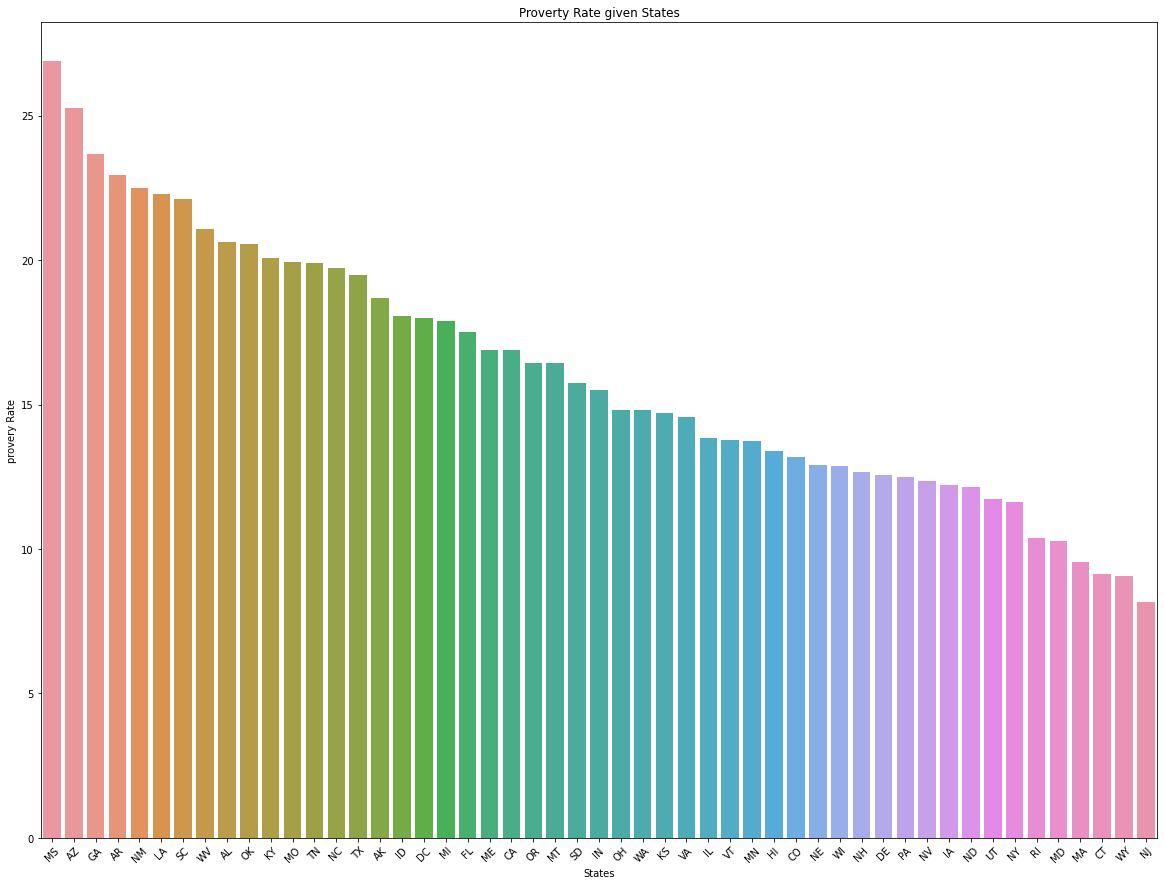

In [25]:
#Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(["-"],0.0,inplace=True)
percentage_people_below_poverty_level.poverty_rate=percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list=list(percentage_people_below_poverty_level['Geographic_Area'].unique())
area_proverty_ratio=[]
for i in area_list:
    x=percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic_Area']==i]
    area_proverty_rate=sum(x.poverty_rate)/len(x)
    area_proverty_ratio.append(area_proverty_rate)
data=pd.DataFrame({'area_list':area_list,'area_proverty_ratio':area_proverty_ratio})
new_index=(data['area_proverty_ratio'].sort_values(ascending=False)).index.values
shorted_data=data.reindex(new_index)
#visualization
plt.figure(figsize=(20,15))
sns.barplot(x=shorted_data['area_list'],y=shorted_data['area_proverty_ratio'])
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('provery Rate')
plt.title('Proverty Rate given States')
plt.show()

In [26]:
data.head(51)

,area_list,area_proverty_ratio
0,AL,20.611795
1,AK,18.678592
2,AZ,25.268071
3,AR,22.963216
4,CA,16.888371
5,CO,13.187773
6,CT,9.137500
7,DE,12.555844
8,DC,18.000000
9,FL,17.508606


<a id='4'></a><br>
### 3.Most common 15 Name or Surname of killed people<br>

In [27]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [28]:
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [29]:
names="tolga tanrısever"
newnames=names.split()
newnames

name_count=Counter(name_list)
most_common_names


NameError: name 'name_list' is not defined

In [ ]:
separate=kill.name[kill.name !='TK TK'].str.split()
a,b=zip(*separate)
name_list=a+b
name_count=Counter(name_list)
most_common_names=name_count.most_common(15)
most_common_names
x,y=zip(*most_common_names)
x,y=list(x),list(y)

plt.figure(figsize=(20,15))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

<a id='5'></a><br>
### 4.High school graduation rate of the population that is older than 25 in states<br>

In [ ]:
percent_over_25_completed_highSchool.head()

In [ ]:
percent_over_25_completed_highSchool['Geographic Area'].describe()

In [ ]:
percent_over_25_completed_highSchool['percent_completed_hs'].value_counts()

In [ ]:
percent_over_25_completed_highSchool['Geographic Area'].unique()

In [ ]:
percent_over_25_completed_highSchool.value_counts()

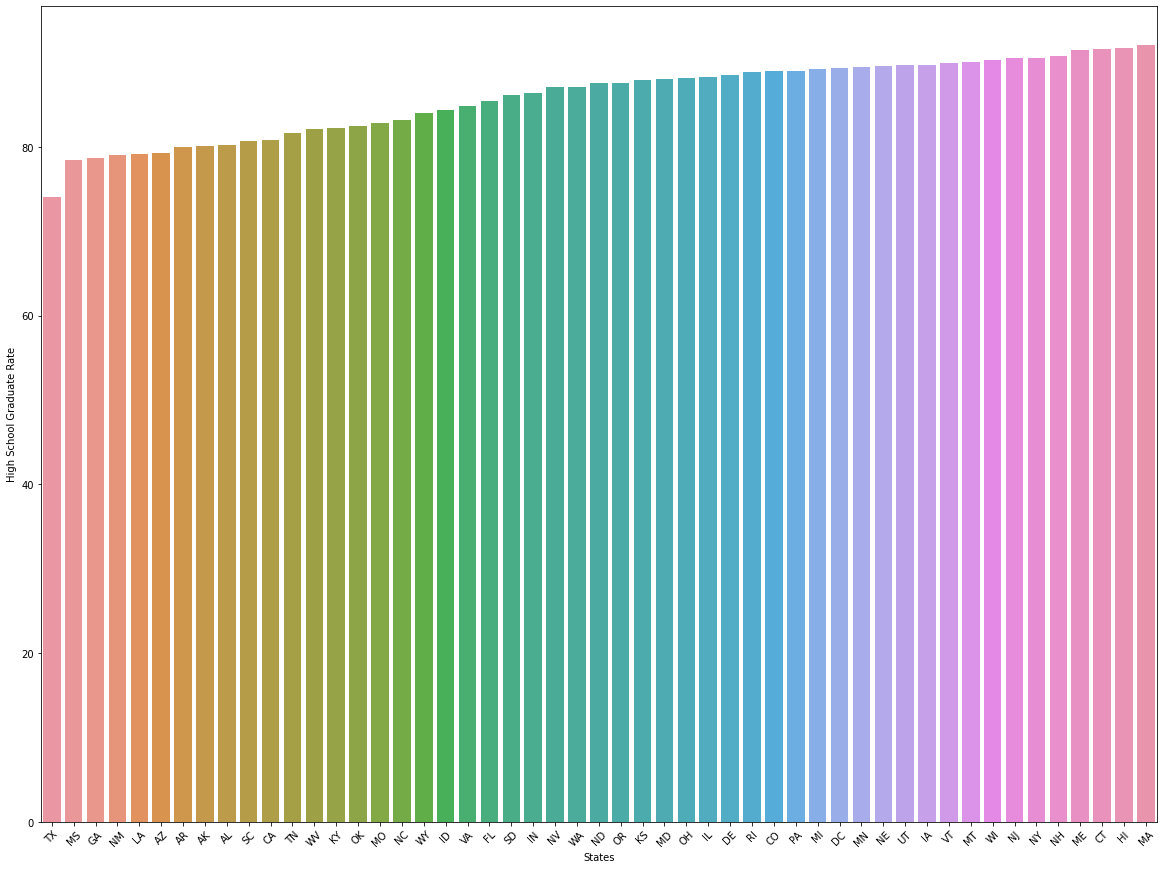

In [36]:
#High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace=True)
percent_over_25_completed_highSchool.percent_completed_hs=percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list=list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highscholl=[]
for i in area_list:
    x=percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highscholl_rate=sum(x.percent_completed_hs)/len(x)
    area_highscholl.append(area_highscholl_rate)
    
#shorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio': area_highscholl})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
#visualizatoin
plt.figure(figsize=(20,15))
sns.barplot(x=sorted_data2['area_list'],y=sorted_data2['area_highschool_ratio'])
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.xticks(rotation=45)
plt.show()

In [30]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [31]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [32]:
share_race_city.loc[10:20,['share_white','share_black','share_native_american','share_asian','share_hispanic']]


,share_white,share_black,share_native_american,share_asian,share_hispanic
10,79.6,0.6,0.3,0.6,49.4
11,95.8,1.7,0.2,0.2,1.1
12,70.5,25.9,0.4,1,1.9
13,97.9,0,0.4,0,0.7
14,44.7,51.5,0.3,0.8,2.7
15,96.6,0.1,0.6,0.7,1.7
16,94.3,1.9,0.8,0.9,1.3
17,94.1,3.6,0.4,0.3,0.5
18,78.3,19.2,0,0.1,6
19,94.4,0,0.6,0.3,1.4


[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

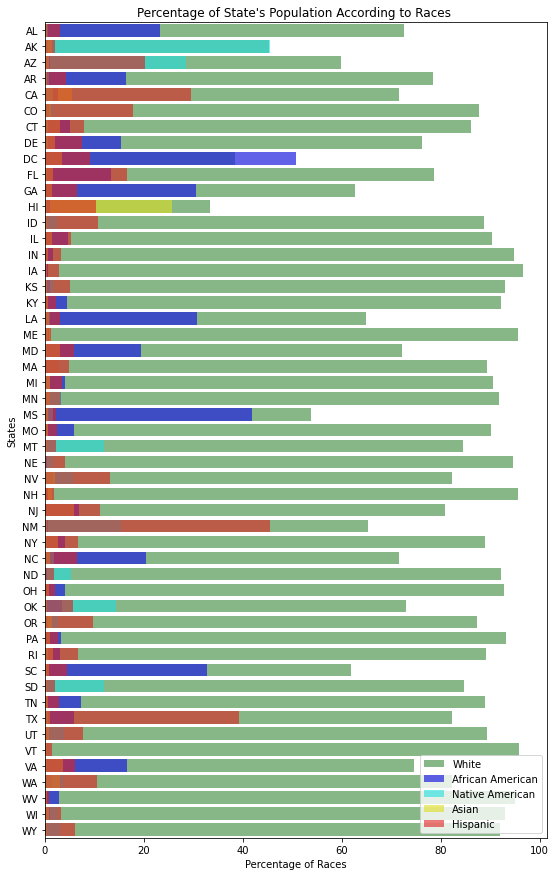

In [37]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace=True)
share_race_city.replace(['(X)'],0.0,inplace=True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list=(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x=share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x)) 
    share_black.append(sum(x.share_black)/len(x)) 
    share_native_american.append(sum(x.share_native_american)/len(x)) 
    share_asian.append(sum(x.share_asian)/len(x)) 
    share_hispanic.append(sum(x.share_hispanic)/len(x)) 
    
# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

<a id='12'></a><br>
### 12. Point Plot<br>


In [34]:
shorted_data.head()

,area_list,area_proverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [38]:
sorted_data2.head()

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


In [ ]:
# high school graduation rate vs Poverty rate of each state

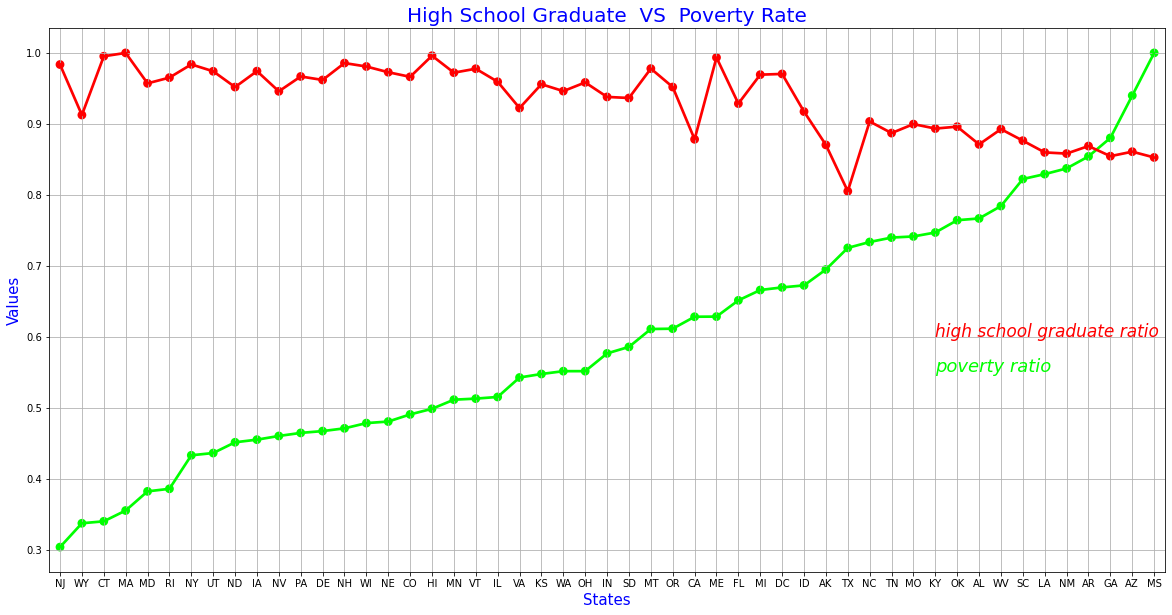

In [39]:
shorted_data['area_proverty_ratio']=shorted_data['area_proverty_ratio']/max(shorted_data['area_proverty_ratio'])
sorted_data2['area_highschool_ratio']=sorted_data2['area_highschool_ratio']/max(sorted_data2['area_highschool_ratio'])
data=pd.concat([shorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_proverty_ratio',inplace=True)

#visualizetion
f,ax = plt.subplots(figsize = (20,10))
sns.pointplot(x=data['area_list'],y=data['area_proverty_ratio'],color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

In [42]:
data


,area_list,area_proverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107
39,RI,0.385707,0.965191
32,NY,0.432929,0.983804
44,UT,0.436115,0.974097
34,ND,0.451265,0.951839
15,IA,0.454971,0.974321


<a id='13'></a><br>
### 13. Join Plot<br>


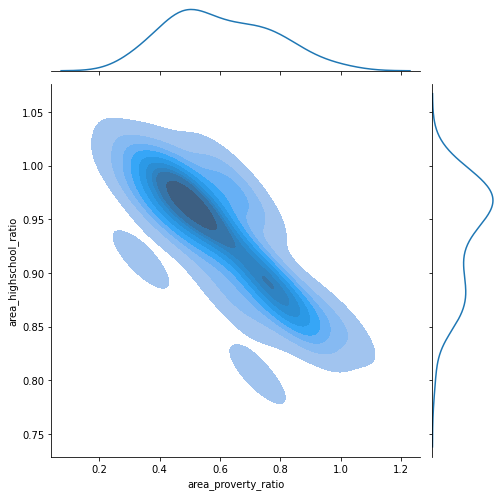

In [100]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
g = sns.jointplot("area_proverty_ratio", "area_highschool_ratio", data=data, kind="kde",shade=True, size=7)
plt.savefig('graph.png')
plt.show()

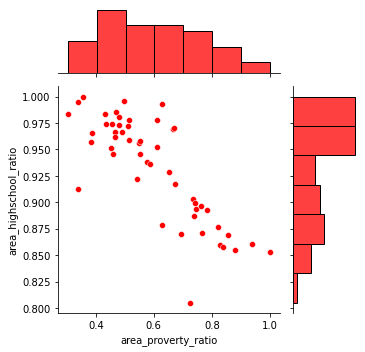

In [48]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_proverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="r")

<a id='14'></a><br>
### 14. PiePlot<br>

In [51]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [54]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [83]:
print(kill.race.unique())
print("index  ;","value", "\n", kill.race.value_counts())
print(labels,"indexs")
print(sizes,"value")

['A' 'W' 'H' 'B' 'O' nan 'N']
index  ; value 
 W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64
Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object') indexs
[1201  618  423   39   31   28] value


In [71]:
print(type(labels1))
print(type(labels))


<class 'numpy.ndarray'>
<class 'pandas.core.indexes.base.Index'>


array([1201,  618,  423,   39,   31,   28])

Text(0.5, 1.0, 'Killed People According to Races')

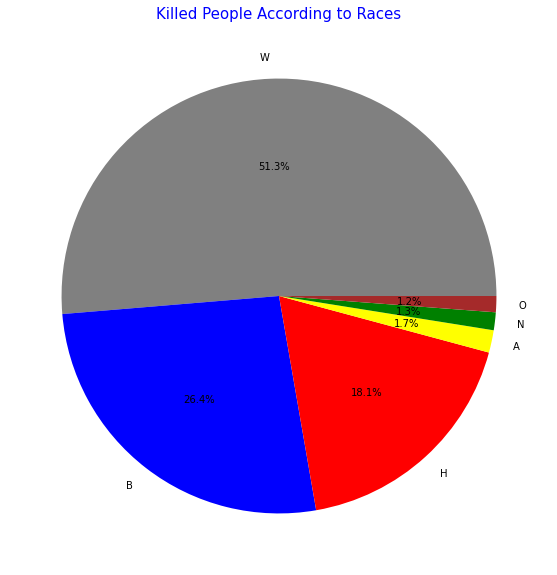

In [85]:
kill.race.dropna(inplace=True)
labels=kill.race.value_counts().index
labels1=kill.race.unique()
colors=['grey','blue','red','yellow','green','brown']
explode=[0,0,0,0,0,0]
sizes=kill.race.value_counts().values

# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

<a id='15'></a><br>
### 15. LmPlot<br>

In [91]:
data

,area_list,area_proverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107
39,RI,0.385707,0.965191
32,NY,0.432929,0.983804
44,UT,0.436115,0.974097
34,ND,0.451265,0.951839
15,IA,0.454971,0.974321


In [98]:
data.head(12)

,area_list,area_proverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107
39,RI,0.385707,0.965191
32,NY,0.432929,0.983804
44,UT,0.436115,0.974097
34,ND,0.451265,0.951839
15,IA,0.454971,0.974321


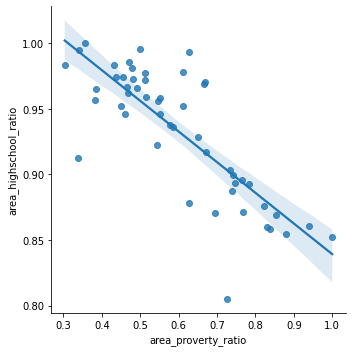

In [99]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot("area_proverty_ratio", "area_highschool_ratio", data=data)
plt.show()

<a id='16'></a><br>
### 16. KdePlot<br>

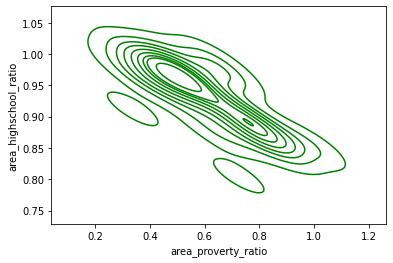

In [105]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot
sns.kdeplot("area_proverty_ratio", "area_highschool_ratio", data=data, shade=False, color='green',cut=3)
plt.show()

<a id='17'></a><br>
### 17.Violin Plot<br>

In [116]:
data

,area_list,area_proverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107
39,RI,0.385707,0.965191
32,NY,0.432929,0.983804
44,UT,0.436115,0.974097
34,ND,0.451265,0.951839
15,IA,0.454971,0.974321


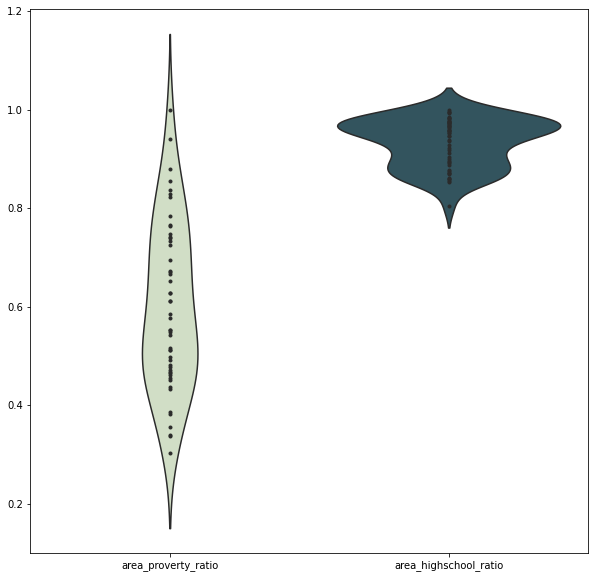

In [110]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
f,ax = plt.subplots(figsize = (10,10))
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

<a id='17'></a><br>
### 17. Head Map <br>

In [118]:
data.corr()


matplotlib.axes._subplots.AxesSubplot

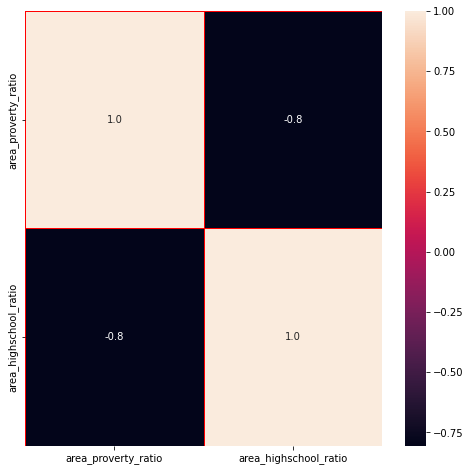

In [115]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id='18'></a><br>
### 18. Box Plot <br>

In [120]:
kill.head(14)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


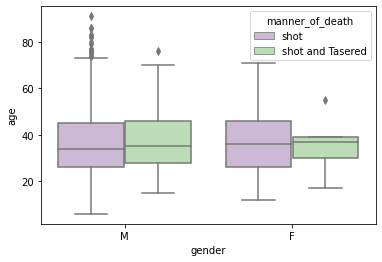

In [119]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

<a id='19'></a><br>
### 19.Swarm Plot <br>

In [129]:
data.head()

,area_list,area_proverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


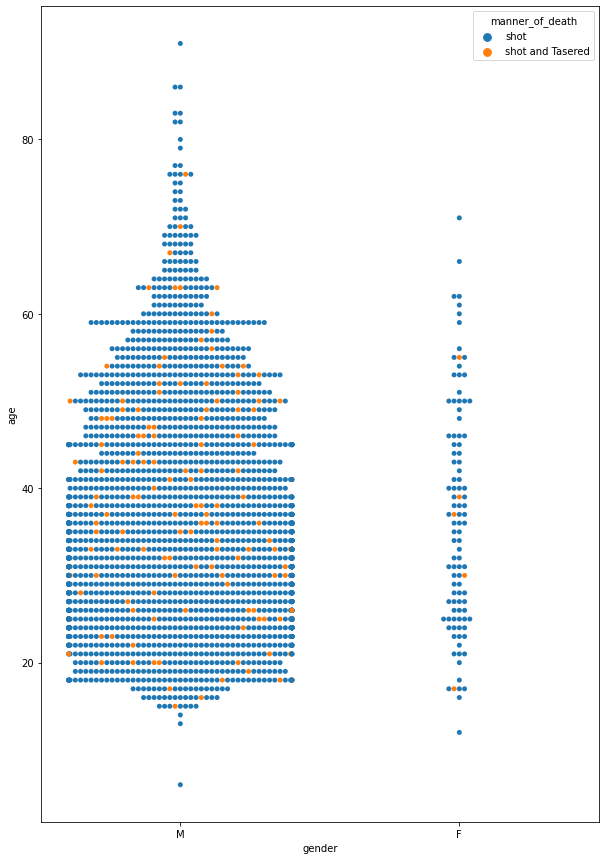

In [132]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
f,ax = plt.subplots(figsize=(10,15))
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

<a id='20'></a><br>
### 20.Pair Plot <br>

In [135]:
data.head()

,area_list,area_proverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


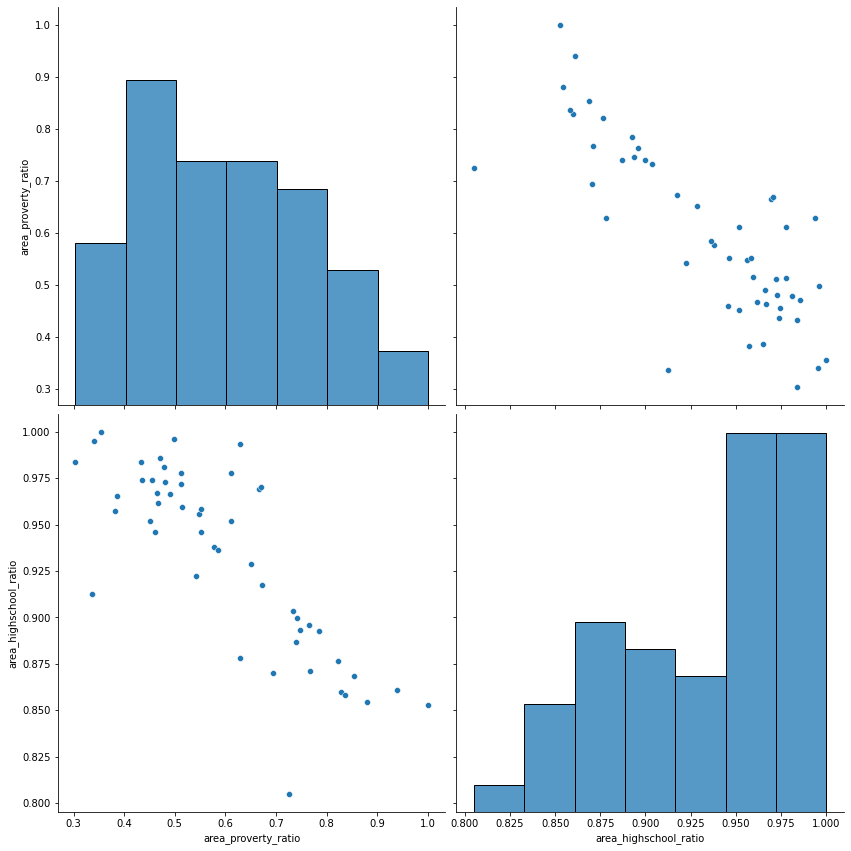

In [145]:
# pair plot
sns.pairplot(data,height=6)
plt.show()

<a id='21'></a><br>
### 21.Count Plot <br>

In [149]:
kill.gender.value_counts()


M    2428
F     107
Name: gender, dtype: int64

In [151]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5, 1.0, 'gender')

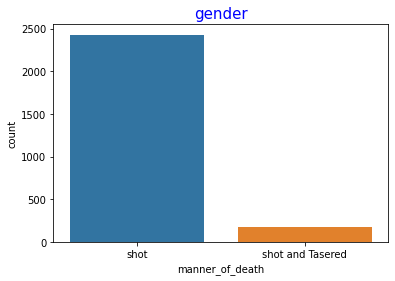

In [154]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

<AxesSubplot:xlabel='armed', ylabel='count'>

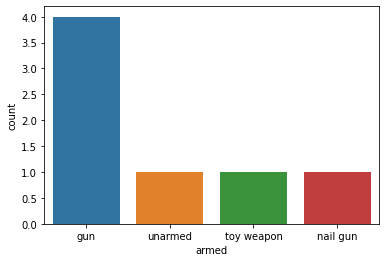

In [165]:
kill.armed.value_counts()
sns.countplot(kill.armed[])

Text(0.5, 1.0, 'Kill weapon')

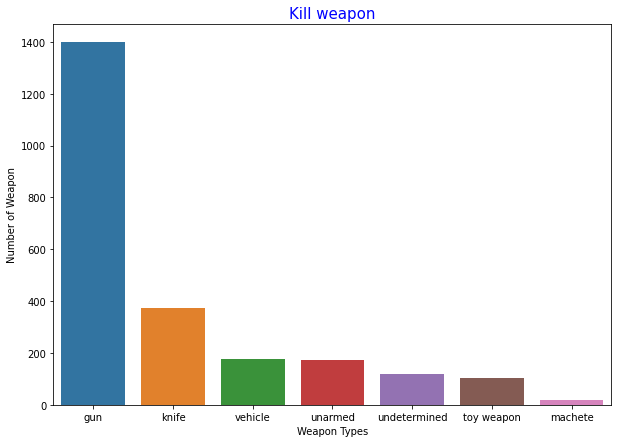

In [157]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)